In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rc('font', family="Arial")
plt.rcParams['font.size'] = '12'

Phase portrait

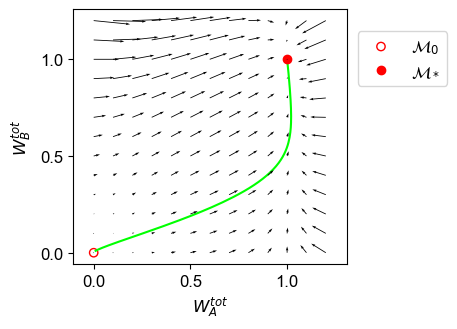

In [7]:
def early(X, t=None):
    a, b = X
    dwA = (4 - 4*a) * (2*a**2 + b**2) + (1 - b) * a*b
    dwB = (4 - 4*a) * a*b + (1 - b) * (a**2 + 2*b**2)
    return [dwA, dwB]

uA = np.linspace(0, 1.2, 13)
uB = np.linspace(0, 1.2, 13)
uA, uB = np.meshgrid(uA, uB)
duA, dbB = np.zeros(uA.shape), np.zeros(uB.shape)
NI, NJ = uA.shape
for i in range(NI):
    for j in range(NJ):
        duA[i,j], dbB[i,j] = early([uA[i, j], uB[i, j]])

# time-course trajectory
from scipy.integrate import odeint
t = np.linspace(0, 100, 5000)
init = [1e-2,1e-2]
sol = odeint(early, init, t)

u_fp = 1 # 2**(-0.25)

plt.figure(figsize=(4.5, 3.2))     
plt.plot(sol[:, 0], sol[:, 1], c='lime')
Q = plt.quiver(uA, uB, duA, dbB, color='k', width=0.003, zorder=20)
plt.scatter(0, 0, c='none', edgecolors='r', label=r'$\mathcal {M}_0$')
plt.plot(u_fp, u_fp, 'ro', label=r'$\mathcal {M}_*$')
plt.legend(loc=(1.04, 0.7))
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.xlabel(r"$W_A^{tot}$")
plt.ylabel(r"$W_B^{tot}$")
plt.axis('equal')
plt.tight_layout(pad=0.3)
plt.savefig('early_phase_portrait.pdf')

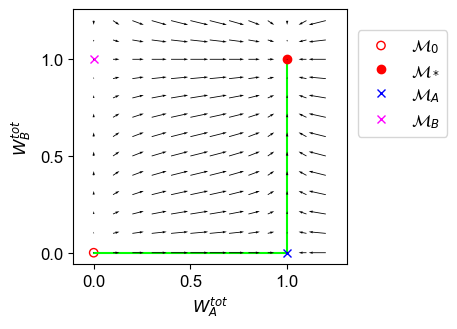

In [2]:
def late(x,y):
    d1 = (4 - 4*x) * x
    d2 = (1 - y) * y
    return d1, d2

x1 = np.linspace(0, 1.2, 13)
x2 = np.linspace(0, 1.2, 13)
X1, X2 = np.meshgrid(x1, x2)
u, v = np.zeros(X1.shape), np.zeros(X2.shape)
NI, NJ = X1.shape
for i in range(NI):
    for j in range(NJ):
        u[i,j], v[i,j] = late(X1[i, j], X2[i, j])

plt.figure(figsize=(4.5,3.2))     
plt.plot([0,1,1], [0,0,1], c='lime')
Q = plt.quiver(X1, X2, u, v, color='k', width=0.003, zorder=20)
plt.scatter(0, 0, c='none', edgecolors='r', label=r'$\mathcal {M}_0$')
plt.plot(1, 1, 'ro', label=r'$\mathcal {M}_*$')
plt.plot(1, 0, 'bx', label=r'$\mathcal {M}_A$')
plt.plot(0, 1, c='fuchsia', marker='x', linestyle='none', label=r'$\mathcal {M}_B$')
plt.legend(loc=(1.04, 0.5))
plt.xlabel(r"$W_A^{tot}$")
plt.ylabel(r"$W_B^{tot}$")
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.axis('equal')
plt.tight_layout(pad=0.3)
plt.savefig('late_phase_portrait.pdf')

Superficial modality preference

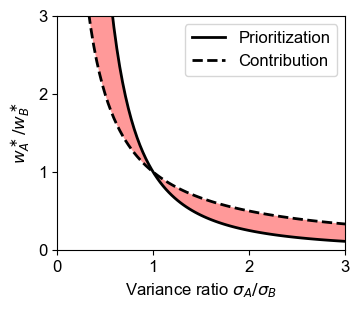

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 3))
ratio = np.linspace(0.02, 3, 100)
contribute = 1/ratio
priorize = 1/ratio**2
plt.plot(ratio, priorize, 'k', linewidth=2, label='Prioritization')
plt.plot(ratio, contribute, 'k--', linewidth=2, label='Contribution')
ax.fill_between(ratio, contribute, priorize, color='r', edgecolor='none', alpha=0.4)
plt.xlabel(r"Variance ratio $\sigma_A / \sigma_B$")
plt.ylabel(r"$w_A^\ast / w_B^\ast$")
plt.xlim((0, 3))
plt.ylim((0, 3))
plt.xticks([0, 1, 2, 3])
plt.yticks([0, 1, 2, 3])
plt.legend()
plt.tight_layout(pad=0.3)

Heatmap of time ratio, mis-attribution

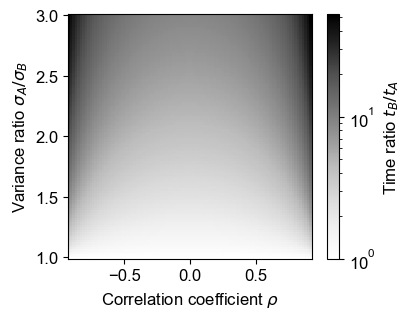

In [5]:
plt.figure(figsize=(4, 3.1))
rho = np.linspace(-0.92, 0.92, 100)
ratio = np.linspace(1, 3, 100)
rho_, ratio_ = np.meshgrid(rho, ratio)
rho_.shape, ratio_.shape
lag = 1 + (ratio_**2 - 1) / (1 - rho_**2)
plt.pcolor(rho, ratio, lag, cmap='Greys', norm=matplotlib.colors.LogNorm(), rasterized=True)
plt.xlabel(r"Correlation coefficient $\rho$")
plt.ylabel(r"Variance ratio $\sigma_A / \sigma_B$")
cbar = plt.colorbar()
cbar.set_label('Time ratio $t_B / t_A$')
plt.tight_layout(pad=0.3)
plt.savefig("toy_sweep_time_heatmap.pdf")

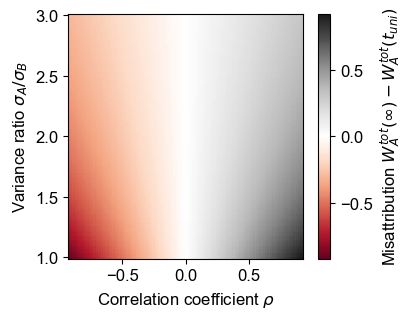

In [6]:
plt.figure(figsize=(4, 3.1))
rho = np.linspace(-0.92, 0.92, 100)
ratio = np.linspace(1, 3, 100)
rho_, ratio_ = np.meshgrid(rho, ratio)
rho_.shape, ratio_.shape
bias = rho_/ratio_
plt.pcolor(rho, ratio, bias, cmap='RdGy', rasterized=True)
plt.xlabel(r"Correlation coefficient $\rho$")
plt.ylabel(r"Variance ratio $\sigma_A / \sigma_B$")
cbar = plt.colorbar()
cbar.set_label('Misattribution $W_{A}^{tot}(\infty) - W_{A}^{tot}(t_{uni})$')
plt.tight_layout(pad=0.3)
plt.savefig("toy_sweep_misattribute_heatmap.pdf")